In [1]:
import numpy as np

from sklearn.metrics import mean_squared_error
from neuralregressionnetwork import NeuralRegressionNetwork
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [2]:
import pandas as pd

df_train = pd.read_table("sincTrain25.dt",header=None, delimiter=" ")
x_train = df_train[0].to_numpy()
y_train = df_train[1].to_numpy()

df_test = pd.read_table("sincValidate10.dt",header=None,delimiter=" ")
x_test = df_test[0].to_numpy()
y_test = df_test[1].to_numpy()

nn2 = NeuralRegressionNetwork(no_of_neurons=[10,10,10])
ls2, es, gs = nn2.train(x_train,y_train,"test",0.0001,x_val=x_test,y_val=y_test)

4


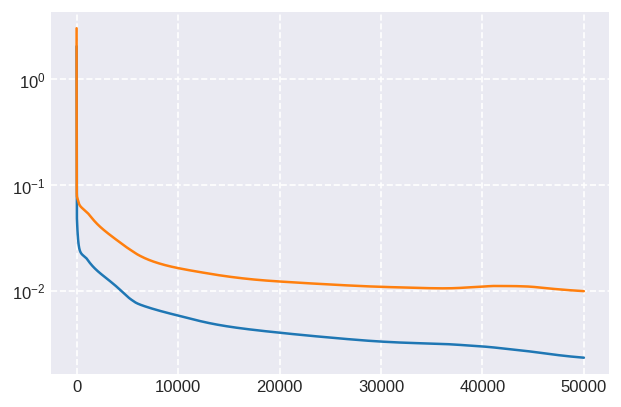

In [3]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.grid(linestyle='--', linewidth=1)
ax.plot(range(len(ls2)),np.array(ls2))
ax.plot(range(len(es)),np.array(es))
fig.savefig('prediction-01-l.jpg')

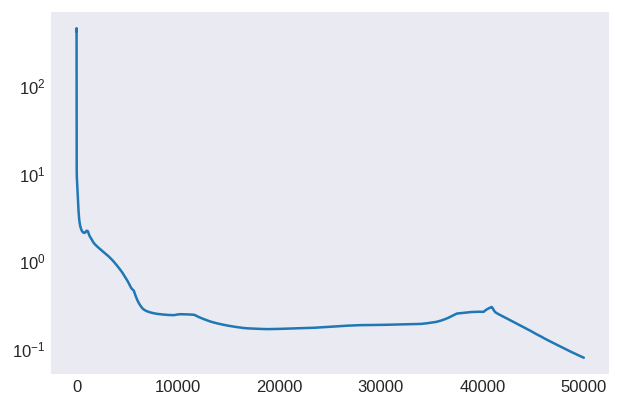

In [4]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.plot(range(len(gs)),gs)
fig.savefig('prediction-01-g.jpg')

<ipython-input-5-3f5ae8157715>:5: RuntimeWarning: invalid value encountered in true_divide
  y_real = np.sin(np.array(x_test3)/100)/(np.array(x_test3)/100)


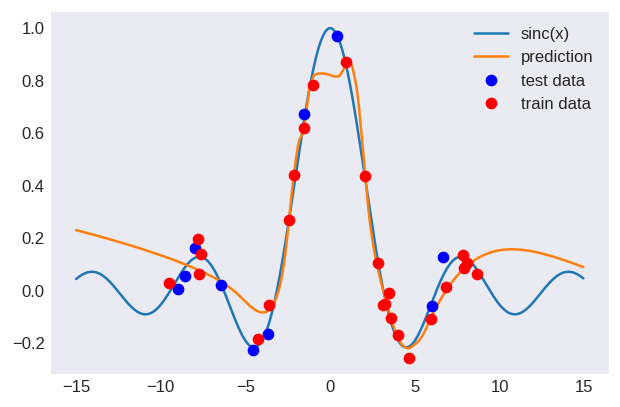

In [5]:
x_test3 = range(-1500,1500,5)
x = np.reshape(np.array(x_test3)/100, (-1,1)).T
_, a_s = nn2.feedForward(x)
y_pred = np.reshape(a_s[len(a_s) - 1], -1)
y_real = np.sin(np.array(x_test3)/100)/(np.array(x_test3)/100)

fig, ax = plt.subplots(dpi=120)
ax.plot(np.array(x_test3)/100, y_real, label='sinc(x)')
ax.plot(np.array(x_test3)/100, y_pred, label='prediction')
ax.plot(x_test, y_test, 'bo', label='test data')
ax.plot(x_train, y_train, 'ro', label='train data')
ax.plot()
ax.legend()
fig.savefig("prediction-01.jpg")